In [1]:
import sys; sys.path.insert(0,'..')
from bechdeltest import *

In [38]:
C=BechdelTest()
# idx='Watchmen-2009'
# t=C.textd[idx]
# t=C.textd['TheAvengers-2012']
t=C.t
t

[BechdelTest] Loading corpus:   0%|          | 0/34 [00:00<?, ?it/s]

(_bechdel_test/BirdmanorTheUnexpectedVirtueofIgnorance-2014)

In [39]:
## Network

In [40]:
# t.get_cast_from_imdb()

In [41]:
# print(t.txt)

In [42]:
def recolor_network(g,source='',target=''):
    for node in g.nodes(): 
        if g.nodes[node]['actor_gender']=='CM':
            g.nodes[node]['color']='green'
        elif g.nodes[node]['actor_gender']=='CF':
            g.nodes[node]['color']='purple'
        else:
            g.nodes[node]['color']='gray'
    
    if source and target and g.has_edge(source,target):
        for a,b,d in g.edges(data=True):
            # if g.nodes[a]['actor_gender'] == 'CM' and g.nodes[b]['actor_gender']=='CM':
                # g.edges[(a,b)]['color']='green'
            if g.nodes[a]['actor_gender'] == 'CF' and g.nodes[b]['actor_gender']=='CF':
                g.edges[(a,b)]['color']='purple'
            else:
                g.edges[(a,b)]['color']='black'
        
        g.edges[source,target]['color']='red'

    return g


def iter_networks(self):
    import networkx as nx
    G = nx.DiGraph()
    dfcast = self.get_cast()
    u2d={}

    def rename(x):
        x=x.split('/')[0].split('(')[0]
        while '  ' in x: x=x.replace('  ',' ')
        return x.strip()

    for d in dfcast.to_dict('records'):
        u=rename(d['char_name'])
        u2d[u]=d
    
    ld = list(self.iter_interactions())
    for t,d in enumerate(tqdm(ld)):
        u,v=rename(d['source']),rename(d['target'])
        d['weight'] = d['num_speeches']
        if u != v:
            if not G.has_node(u): G.add_node(u, **u2d[u])
            if not G.has_node(v): G.add_node(v, **u2d[v])
            if not G.has_edge(u,v):
                G.add_edge(u,v,**d)
            else:
                for kk,vv in d.items():
                    if type(vv)==str: vv = ' || '+vv
                    v0 = G.edges[(u,v)].get(kk)
                    G.edges[(u,v)][kk]=v0+vv if type(v0)==type(vv) and type(v0) in {str,int} else vv
            
            yield recolor_network(G,u,v)

        # if t>25: break
        

In [43]:
from lltk.model.networks import draw_nx_dynamic
for g in iter_networks(t): pass
# fig,htm=draw_nx_dynamic(iter_networks(t), final_g=g)
# htm

100%|██████████| 887/887 [00:00<00:00, 8540.74it/s]


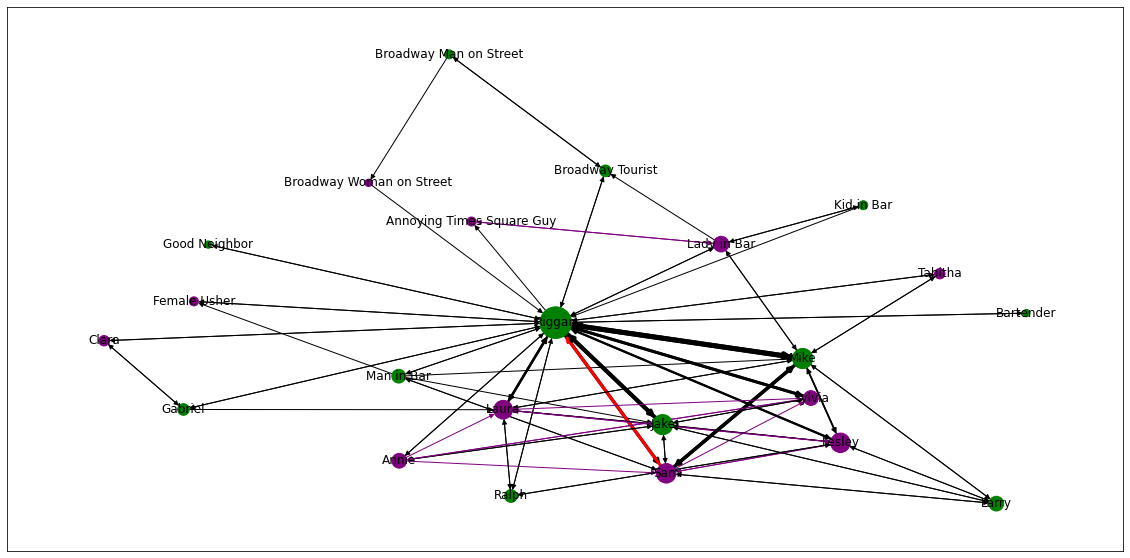

In [44]:
draw_nx(g)

In [45]:
do_get_bechdel_score(t.imdb)

{'rating': 3,
 'visible': '1',
 'title': 'Birdman',
 'date': '2014-11-10 00:33:16',
 'id': 5911,
 'submitterid': 11188,
 'dubious': '0',
 'year': 2014,
 'imdbid': '2562232'}

In [46]:
for a,b,d in g.edges(data=True):
    if g.nodes[a]['actor_gender']=='CF' and g.nodes[b]['actor_gender']=='CF':
        print(a,'-->',b)
        print(d['speech'])
        print()

Sam --> Lesley
It's cool. He's a handful, huh?

Sam --> Sylvia
Alchemillas. || Are you actually smiling? What's so funny?

Annie --> Sam
Riggan, they're starting scene five. We need you on stage.

Annie --> Laura
Wake up! Wake up!

Annie --> Sylvia
Places for act two. Places.

Lesley --> Laura
No. Okay, well, he did beat me up one night. He dragged me around the living room by my ankles, yelling "I love you, I love 10/29/14 / 4. || you, bitch." What do you do with a love like that? || Is he breathing? || Okay, well I'm gonna-- Thank you. || Mike, cut it out. || He's an asshole. || Oh, nothing. He just tried to fuck me in front of a full house. || Right? || Why don't I have any self-respect? || I'm pathetic. You know, I've dreamt of being a Broadway actress since I was a little kid. And now I'm here. And I'm not a Broadway actress. I'm still just a little kid. And I keep waiting for someone to tell me I made it. || I did? || Shut. Up. Riggan steps into the doorway and sees Laura hugging

In [11]:
# dfcasts = C.get_casts()

In [12]:
dfcasts.to_csv(os.path.join(PATH_DATA,'data.superhero_corpus_casts.csv'))

NameError: name 'dfcasts' is not defined

In [ ]:
dfcasts_anno = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRuBd6kmJroxVXWOIrr1Ebf5vKqN2LKbWijSZXyDBDdcHLd2Rp5Qo18OA8YWJ7_lMnDwDdPCHQWzFEF/pub?gid=1934597839&single=true&output=csv',dtype='str').fillna('')
dfcasts_anno

,id,rank_castlist,rank_speaking,actor_name,actor_url,actor_gender,actor_race,char_name,speakers,char_url,char_gender,num_speeches,num_words
0,AvengersEndgame-2019,1,1,Robert Downey Jr.,https://www.imdb.com/name/nm0000375,CM,W,Tony Stark / Iron Man,A1 TONY; TONY,https://www.imdb.com/title/tt4154796/character...,CM,142,2626
1,AvengersEndgame-2019,2,2,Chris Evans,https://www.imdb.com/name/nm0262635,CM,W,Steve Rogers / Captain America,STEVE ROGERS shaves; STEVE; A1 STEVE,https://www.imdb.com/title/tt4154796/character...,CM,105,1597
2,AvengersEndgame-2019,4,3,Chris Hemsworth,https://www.imdb.com/name/nm1165110,CM,W,Thor,THOR I guess not; ROCKET THOR I can do this; T...,https://www.imdb.com/title/tt4154796/character...,CM,73,1193
3,AvengersEndgame-2019,8,4,Paul Rudd,https://www.imdb.com/name/nm0748620,CM,W,Scott Lang / Ant-Man,AS...GIANT-MAN BURSTS FROM BELOW. SCOTT LANG; ...,https://www.imdb.com/title/tt4154796/character...,CM,66,1083
4,AvengersEndgame-2019,5,5,Scarlett Johansson,https://www.imdb.com/name/nm0424060,CF,W,Natasha Romanoff / Black Widow,A1 NATASHA; NATASHA,https://www.imdb.com/title/tt4154796/character...,CF,65,851
...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,XMenOriginsWolverine-2009,55,15,Panou,https://www.imdb.com/name/nm0659698,,,Tank Soldier,SOLDIER #1,https://www.imdb.com/title/tt0458525/character...,,3,72
718,XMenOriginsWolverine-2009,42,16,Alexandra Davies,https://www.imdb.com/name/nm0203567,CF,,Woman of the Night (as Alex Davies),LADY OF THE NIGHT,https://www.imdb.com/title/tt0458525/character...,CF,2,33
719,XMenOriginsWolverine-2009,28,17,Matthew Dale,https://www.imdb.com/name/nm1035261,CM,,Surgeon,SURGEON,https://www.imdb.com/title/tt0458525/character...,,3,26
720,XMenOriginsWolverine-2009,29,18,Nathin Butler,https://www.imdb.com/name/nm2530433,CM,,Male Nurse #1,MALE NURSE #1,https://www.imdb.com/title/tt0458525/character...,,2,23


In [ ]:
df_actors = pd.concat([dfcasts_anno.query('actor_race!=""'), dfcasts_anno]).drop_duplicates('actor_url')
df_actors = df_actors[[col for col in df_actors if col.startswith('actor_')]]
df_actors.set_index('actor_url').to_csv(os.path.join(PATH_DATA,'data.superhero_corpus_actors.csv'))

In [ ]:
dfcasts_anno_done = pd.concat(
    moviedf if not len(moviedf[moviedf.actor_race=='']) else pd.DataFrame()
    for id,moviedf in dfcasts_anno.groupby('id')
)
dfcasts_anno_done

,id,rank_castlist,rank_speaking,actor_name,actor_url,actor_gender,actor_race,char_name,speakers,char_url,char_gender,num_speeches,num_words
0,AvengersEndgame-2019,1,1,Robert Downey Jr.,https://www.imdb.com/name/nm0000375,CM,W,Tony Stark / Iron Man,A1 TONY; TONY,https://www.imdb.com/title/tt4154796/character...,CM,142,2626
1,AvengersEndgame-2019,2,2,Chris Evans,https://www.imdb.com/name/nm0262635,CM,W,Steve Rogers / Captain America,STEVE ROGERS shaves; STEVE; A1 STEVE,https://www.imdb.com/title/tt4154796/character...,CM,105,1597
2,AvengersEndgame-2019,4,3,Chris Hemsworth,https://www.imdb.com/name/nm1165110,CM,W,Thor,THOR I guess not; ROCKET THOR I can do this; T...,https://www.imdb.com/title/tt4154796/character...,CM,73,1193
3,AvengersEndgame-2019,8,4,Paul Rudd,https://www.imdb.com/name/nm0748620,CM,W,Scott Lang / Ant-Man,AS...GIANT-MAN BURSTS FROM BELOW. SCOTT LANG; ...,https://www.imdb.com/title/tt4154796/character...,CM,66,1083
4,AvengersEndgame-2019,5,5,Scarlett Johansson,https://www.imdb.com/name/nm0424060,CF,W,Natasha Romanoff / Black Widow,A1 NATASHA; NATASHA,https://www.imdb.com/title/tt4154796/character...,CF,65,851
...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,SupermanII-1980,25,10,Shane Rimmer,https://www.imdb.com/name/nm0727300,CM,W,Controller #2,CONTROLLER #2 A girl; CONTROLLER #2,https://www.imdb.com/title/tt0081573/character...,,2,134
480,SupermanII-1980,3,11,Ned Beatty,https://www.imdb.com/name/nm0000885,CM,W,Otis,OTIS,https://www.imdb.com/title/tt0081573/character...,CM,10,91
481,SupermanII-1980,24,12,John Ratzenberger,https://www.imdb.com/name/nm0001652,CM,W,Controller #1,CONTROLLER #1; CONTROLLER VOICE,https://www.imdb.com/title/tt0081573/character...,CM,5,86
482,SupermanII-1980,12,13,Marc McClure,https://www.imdb.com/name/nm0566013,CM,W,Jimmy Olsen,JIMMY,https://www.imdb.com/title/tt0081573/character...,CM,9,64


In [ ]:
C.aerw

In [ ]:
dfcasts_anno_done.id.value_counts()

AvengersEndgame-2019    47
Batman-1989             34
SupermanII-1980         14
Name: id, dtype: int64